# Importing and EDA

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


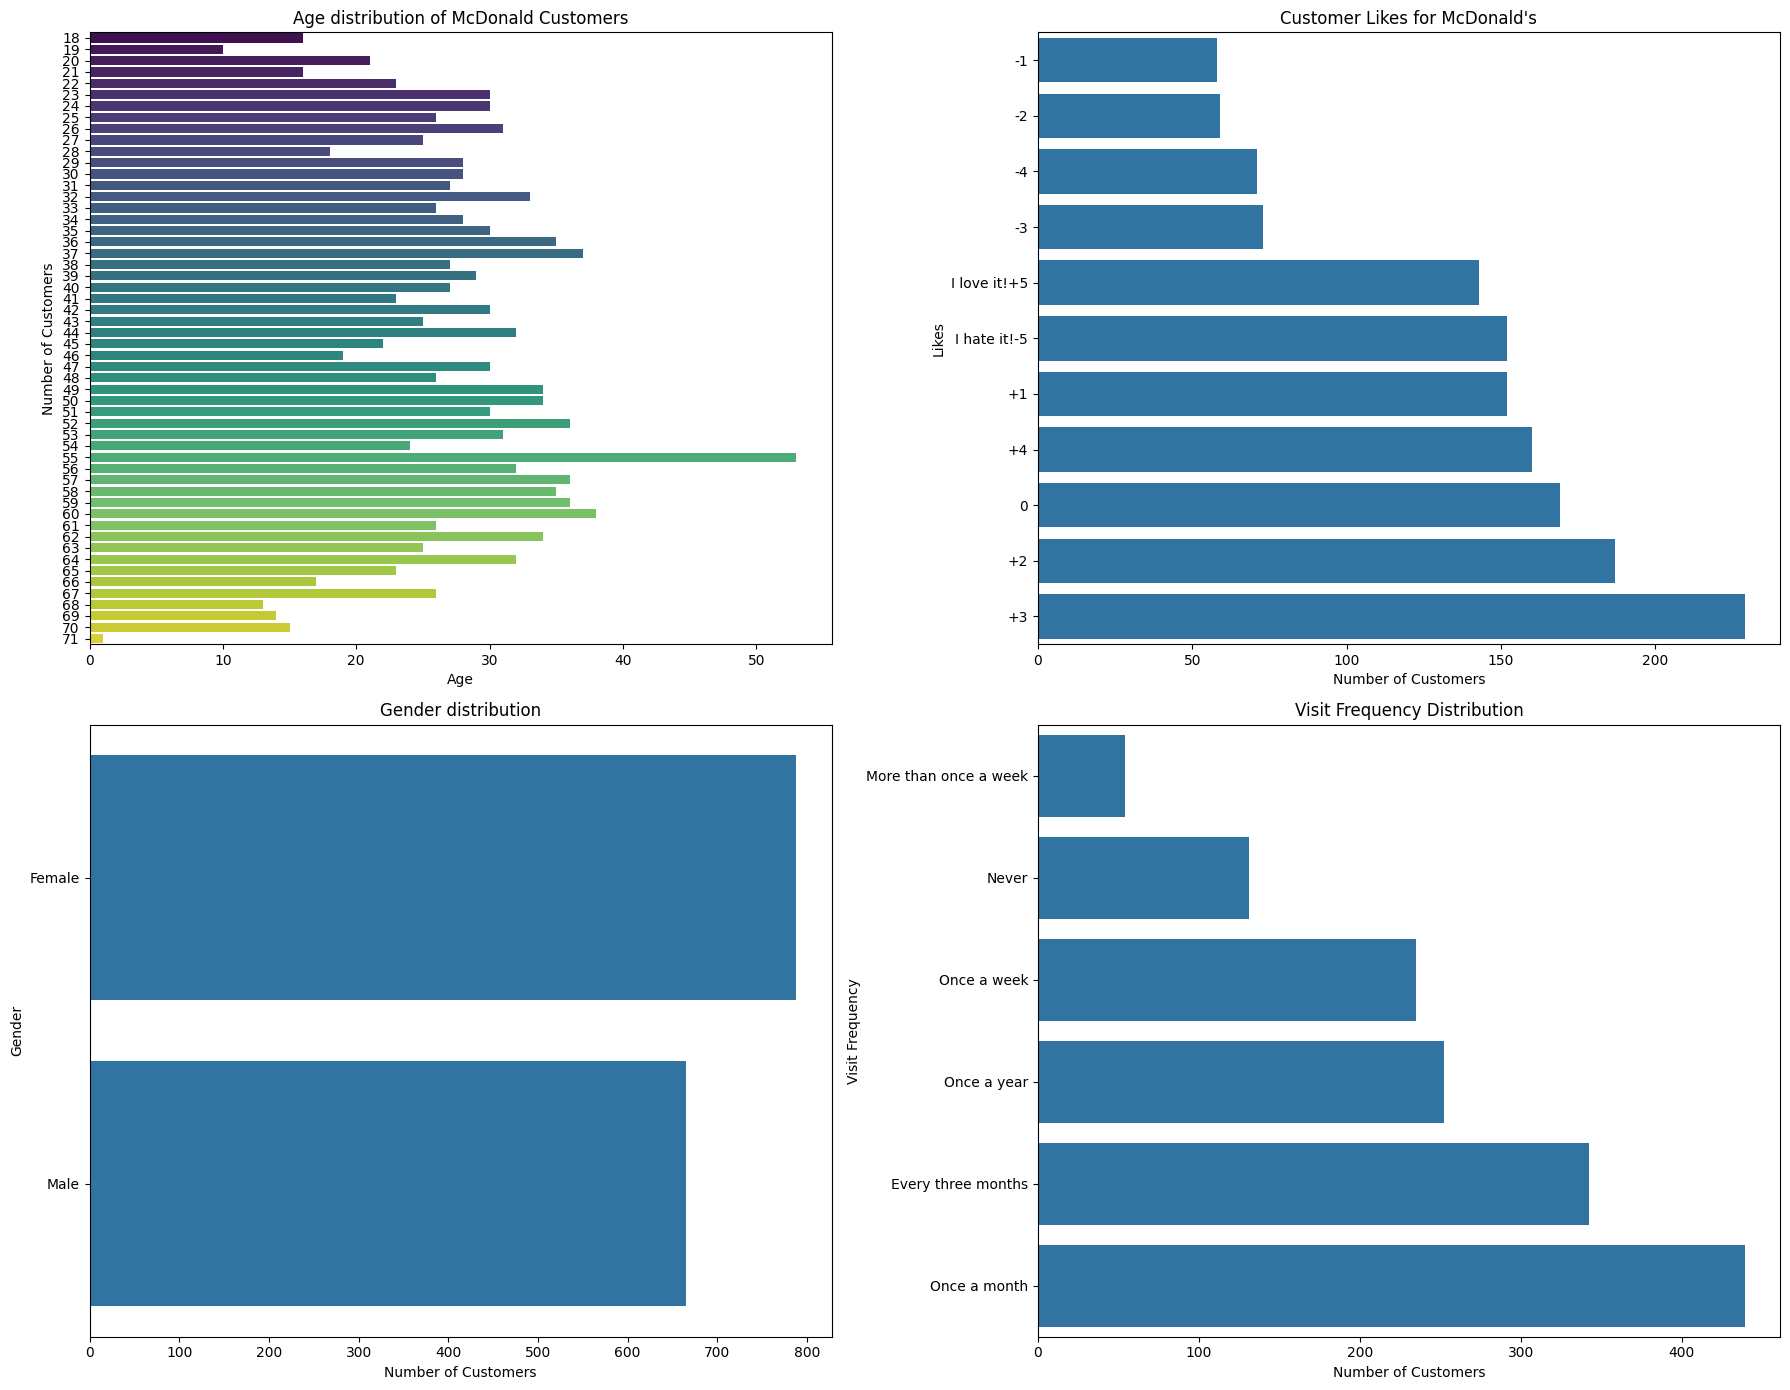

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine three plots into one large figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# countplot of Age -> top-left
sns.countplot(y='Age', data=df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Age distribution of McDonald Customers')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Number of Customers')


# Countplot of Like (horizontal) -> top-right - preserve original ordering
like_order = df['Like'].value_counts().index.tolist()[::-1]
sns.countplot(y='Like', data=df, order=like_order, ax=axes[0, 1])
axes[0, 1].set_title("Customer Likes for McDonald's")
axes[0, 1].set_xlabel('Number of Customers')
axes[0, 1].set_ylabel('Likes')

# Countplot of Gender (horizontal) -> bottom-left
sns.countplot(y='Gender', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Gender distribution')
axes[1, 0].set_xlabel('Number of Customers')
axes[1, 0].set_ylabel('Gender')

# Countplot of VisitFrequency(horizontal) -> bottom-right
freq_order = df['VisitFrequency'].value_counts().index.tolist()[::-1]
sns.countplot(y ='VisitFrequency', data=df, order = freq_order, ax=axes[1, 1])
axes[1, 1].set_title('Visit Frequency Distribution')
axes[1, 1].set_xlabel('Number of Customers')
axes[1, 1].set_ylabel('Visit Frequency')

plt.tight_layout()
plt.show()

In [3]:
# drop duplicate rows
df = df.drop_duplicates()

# Encoding and Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
label_encoder = LabelEncoder()
# apply label encoding to 'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'
categorical_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for col in categorical_cols:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

# Apply standard scaling to categorical_cols
scaler = StandardScaler()
df_copy[categorical_cols] = scaler.fit_transform(df_copy[categorical_cols])

df_copy.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,-1.103904,0.320102,-0.324067,0.392469,-1.055337,0.335787,0.824365,-1.339747,1.331637,-0.500873,-0.569012,-3,61,Every three months,Female
1,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,1.331637,-0.500873,-0.569012,+2,51,Every three months,Female
2,-1.103904,0.320102,3.085783,0.392469,0.947564,0.335787,-1.213055,0.746410,1.331637,1.996513,-0.569012,+1,62,Every three months,Female
3,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,-0.750956,-0.500873,1.757433,+4,69,Once a week,Female
4,-1.103904,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,-1.339747,-0.750956,1.996513,-0.569012,+2,49,Once a month,Male


# PCA Dataframe Building

In [5]:
# apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pca_data = pca.fit_transform(df_copy[categorical_cols])
# tansform to dataframe
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(11)])
pca_df.head()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.693292,0.457790,-0.286232,-0.873823,1.505703,-0.455598,0.042382,0.702925,-0.353196,-0.317433,1.702108
1,0.470508,-0.363136,1.602268,-0.032383,-0.460810,0.434931,-0.108627,-0.450103,-0.226779,-0.189278,1.467193
2,-0.181643,-1.696828,0.405835,3.323900,1.285681,-0.145801,0.624131,0.673397,-1.366467,1.261705,-0.133832
3,0.130097,1.149804,1.021156,0.459375,-1.149766,0.848571,-0.035911,-0.425610,1.565772,-0.097576,-0.233354
4,0.053154,1.392333,-0.762014,0.476912,0.257014,0.866214,1.811420,0.676842,-1.619899,-0.092497,-0.033580


In [6]:
# print explained variance ratio culmulative sum
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
for i, variance in enumerate(cumulative_variance):
    print(f'Principal Component {i+1}: {variance:.4f}')

Principal Component 1: 0.2554
Principal Component 2: 0.4030
Principal Component 3: 0.5281
Principal Component 4: 0.6264
Principal Component 5: 0.7099
Principal Component 6: 0.7810
Principal Component 7: 0.8461
Principal Component 8: 0.9002
Principal Component 9: 0.9481
Principal Component 10: 0.9764
Principal Component 11: 1.0000


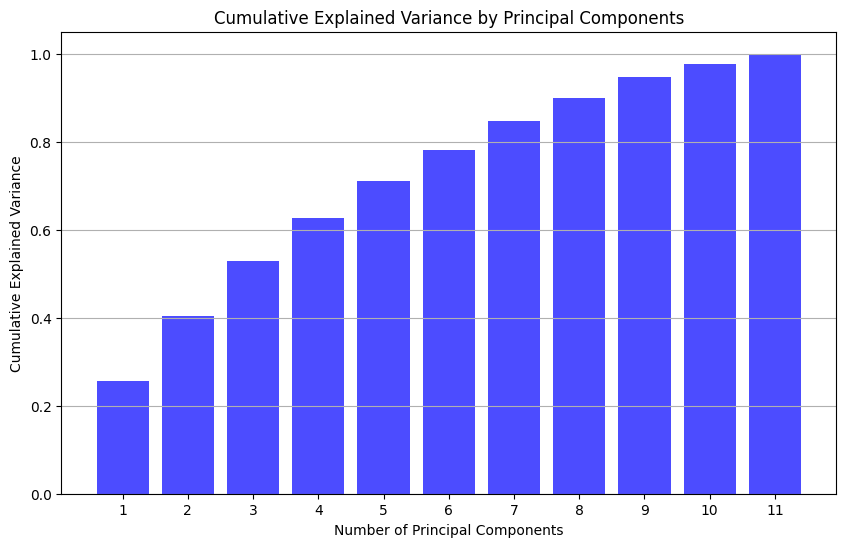

In [7]:
# use barplot to visualize explained cum variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, 12), cumulative_variance, alpha=0.7, color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xticks(range(1, 12))
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.show()

 by barplot, we can figure out top 5 PCA explain about 70% of our original data

# PCA loading matrix & Dimension reduce

we need to know what each PCA actually means

In [8]:
# loading matrix for PCA
loading_matrix = pd.DataFrame(pca.components_.T, index=categorical_cols, columns=[f'PC{i+1}' for i in range(11)])
loading_matrix  

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.404960,-0.287285,0.260870,0.023466,-0.345118,0.121699,-0.162425,-0.018874,0.194177,-0.691746,-0.089428
convenient,0.308171,0.047352,0.319721,-0.019837,0.437172,-0.187075,0.658464,-0.160599,0.336700,-0.028941,0.022027
spicy,0.025301,-0.069101,-0.009648,0.844309,0.191500,-0.440839,-0.208775,0.034704,-0.025504,-0.058195,-0.042354
fattening,-0.177350,0.207910,0.607235,-0.031682,-0.090732,-0.104294,0.031825,0.721158,-0.097219,0.019861,-0.074462
greasy,-0.267672,0.133103,0.397911,0.325045,-0.339919,0.271844,0.297280,-0.492856,-0.353091,0.015175,-0.031903
fast,0.213338,0.283126,0.213410,0.085312,0.567880,0.570552,-0.396680,-0.052292,-0.100240,-0.018751,-0.054750
cheap,0.291992,0.572497,-0.122903,0.119250,-0.260293,-0.017599,0.010894,0.061065,0.061677,-0.058699,0.691739
tasty,0.424724,-0.244535,0.271903,0.068665,-0.283812,0.048637,-0.201324,-0.061334,0.212530,0.713282,0.004178
expensive,-0.293961,-0.565153,0.183958,0.032525,0.210042,0.169913,-0.015946,0.062704,0.010894,-0.026398,0.693758
healthy,0.268428,-0.203826,-0.356231,0.307297,-0.052228,0.452952,0.456641,0.437116,-0.214947,0.055885,-0.090884


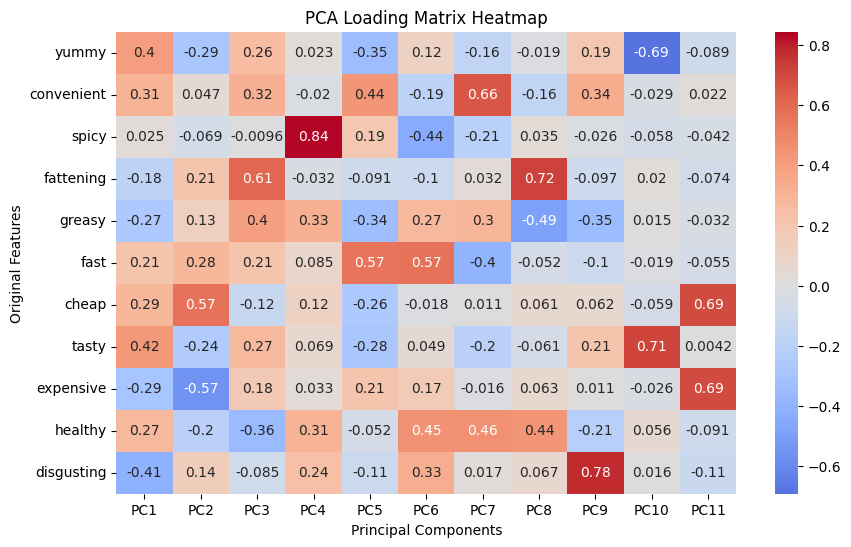

In [9]:
# use heatmap to visualize loading matrix
plt.figure(figsize=(10, 6))
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Loading Matrix Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()

PC1: tasty, yummy vs disgusting  
PC2: cheap vs expensive  
PC3: fattening vs healthy  
PC4: only spicy but no contrary  
PC5: fast convenient

In [10]:
# reduce pca dimension to 5
pca_reduced = PCA(n_components=5)
pca_data_reduced = pca_reduced.fit_transform(df_copy[categorical_cols])
pca_reduced_df = pd.DataFrame(data=pca_data_reduced, columns=[f'PC{i+1}' for i in range(5)])
pca_reduced_df.head()


,PC1,PC2,PC3,PC4,PC5
0,-0.693292,0.457790,-0.286232,-0.873823,1.505703
1,0.470508,-0.363136,1.602268,-0.032383,-0.460810
2,-0.181643,-1.696828,0.405835,3.323900,1.285681
3,0.130097,1.149804,1.021156,0.459375,-1.149766
4,0.053154,1.392333,-0.762014,0.476912,0.257014


# Cluster

In [11]:
# cluster by HDBScan
import hdbscan
import numpy as np

pca_reduced_array = pca_reduced_df[['PC1','PC2','PC3','PC4','PC5']].values

clusterer = hdbscan.HDBSCAN(
            min_cluster_size = 40,
            min_samples=10
        )
cluster_labels = clusterer.fit_predict(pca_reduced_array)

pca_reduced_df['cluster'] = cluster_labels

pca_reduced_df.head()

,PC1,PC2,PC3,PC4,PC5,cluster
0,-0.693292,0.457790,-0.286232,-0.873823,1.505703,2
1,0.470508,-0.363136,1.602268,-0.032383,-0.460810,2
2,-0.181643,-1.696828,0.405835,3.323900,1.285681,0
3,0.130097,1.149804,1.021156,0.459375,-1.149766,-1
4,0.053154,1.392333,-0.762014,0.476912,0.257014,5


In [12]:
# check for cluster_labels nunique
num_clusters = len(np.unique(cluster_labels))
print(f'Number of clusters found: {num_clusters}')

Number of clusters found: 14


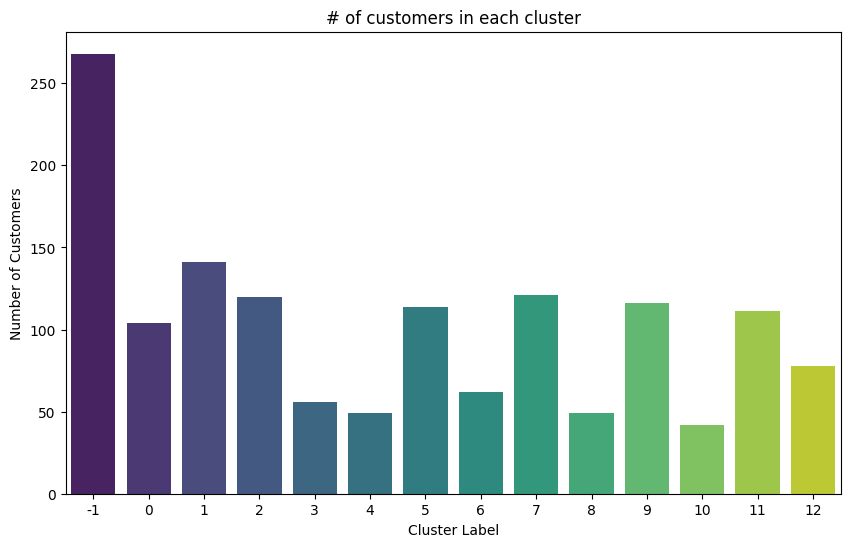

In [13]:
# countplot of cluster labels
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=pca_reduced_df, palette='viridis')
plt.title('# of customers in each cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Customers')
plt.show()

Although HDBSCAN revealed around 12 density-based micro-clusters and a substantial number of noise points, for market segmentation purposes we selected k=4 using KMeans, which provides cleaner and more interpretable segments suitable for business decision-making.

In [14]:
# import KMeans
from sklearn.cluster import KMeans
# draw k=4 KMeans that fit with df_coy
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_copy[categorical_cols])
kmeans_labels = kmeans.labels_
df_copy['kmeans_cluster'] = kmeans_labels
df_copy.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,kmeans_cluster
0,-1.103904,0.320102,-0.324067,0.392469,-1.055337,0.335787,0.824365,-1.339747,1.331637,-0.500873,-0.569012,-3,61,Every three months,Female,3
1,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,1.331637,-0.500873,-0.569012,+2,51,Every three months,Female,1
2,-1.103904,0.320102,3.085783,0.392469,0.947564,0.335787,-1.213055,0.746410,1.331637,1.996513,-0.569012,+1,62,Every three months,Female,1
3,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,-0.750956,-0.500873,1.757433,+4,69,Once a week,Female,1
4,-1.103904,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,-1.339747,-0.750956,1.996513,-0.569012,+2,49,Once a month,Male,3


In [15]:
from collections import Counter
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS)
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))


Labels: [3 1 1 ... 1 0 3]
WCSS: 10219.452444276052
No. of iterations:  7
Cluster centroids:  [[ 0.35883496  0.19782612  0.09964237 -2.54796911 -0.87756509  0.10048251
   0.1854107   0.38843009 -0.30732657  1.0064247  -0.47265005]
 [ 0.62666275  0.29167753  0.00894468  0.39246944 -0.04699904  0.15801391
   0.14615907  0.69762741 -0.11500593  0.03501689 -0.40580852]
 [-0.93780676 -3.1240036  -0.09862218 -0.02065003  0.43442414 -0.86925603
  -0.55636599 -1.06389153  0.62596478 -0.35639649  1.21908232]
 [-0.97283167  0.32010206 -0.02755811  0.35695689  0.31379584 -0.06443883
  -0.16973857 -1.07267859  0.14445836 -0.36816203  0.5492553 ]]
Cluster size:  Counter({np.int32(1): 727, np.int32(3): 414, np.int32(0): 169, np.int32(2): 121})


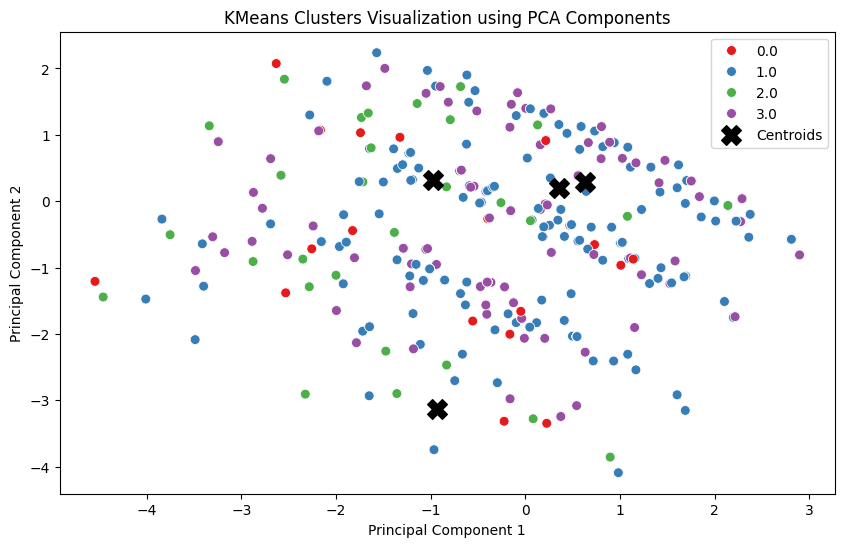

In [16]:
# visualize kmeans clusters using first two pca components and label the centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_reduced_df['PC1'], y=pca_reduced_df['PC2'], hue = df_copy['kmeans_cluster'], palette='Set1', s=50)
# plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')
plt.title('KMeans Clusters Visualization using PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Find our Target Segment

In [17]:
df_copy.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,kmeans_cluster
0,-1.103904,0.320102,-0.324067,0.392469,-1.055337,0.335787,0.824365,-1.339747,1.331637,-0.500873,-0.569012,-3,61,Every three months,Female,3
1,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,1.331637,-0.500873,-0.569012,+2,51,Every three months,Female,1
2,-1.103904,0.320102,3.085783,0.392469,0.947564,0.335787,-1.213055,0.746410,1.331637,1.996513,-0.569012,+1,62,Every three months,Female,1
3,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,-0.750956,-0.500873,1.757433,+4,69,Once a week,Female,1
4,-1.103904,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,-1.339747,-0.750956,1.996513,-0.569012,+2,49,Once a month,Male,3


In [18]:
# print every unique value in Like and VisitFrequency column
print('Unique values in Like column:', df_copy['Like'].unique())
print('Unique values in VisitFrequency column:', df_copy['VisitFrequency'].unique())

Unique values in Like column: ['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
Unique values in VisitFrequency column: ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']


In [19]:
# do orginal mapping to Like with order ascending: I hate it!-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5 I love it!
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}
df_copy['Like_score'] = df_copy['Like'].map(like_mapping)
# do VisitFrequency mapping with order ascending:  'More than once a week', 'Once a week', 'Once a month','Every three months', 'Once a year', 'Never'
visit_freq_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}
df_copy['VisitFrequency_score'] = df_copy['VisitFrequency'].map(visit_freq_mapping)
df_copy.head()

    

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,kmeans_cluster,Like_score,VisitFrequency_score
0,-1.103904,0.320102,-0.324067,0.392469,-1.055337,0.335787,0.824365,-1.339747,1.331637,-0.500873,-0.569012,-3,61,Every three months,Female,3,-3,2
1,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,1.331637,-0.500873,-0.569012,+2,51,Every three months,Female,1,2,2
2,-1.103904,0.320102,3.085783,0.392469,0.947564,0.335787,-1.213055,0.746410,1.331637,1.996513,-0.569012,+1,62,Every three months,Female,1,1,2
3,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,-0.750956,-0.500873,1.757433,+4,69,Once a week,Female,1,4,4
4,-1.103904,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,-1.339747,-0.750956,1.996513,-0.569012,+2,49,Once a month,Male,3,2,3


Customers who have a high VisitFrequency&Like will be our target customers

In [20]:
# group by kmeans_cluster and get mean of VisitFrequency_score and Like_score
cluster_summary = df_copy.groupby('kmeans_cluster')[['VisitFrequency_score', 'Like_score']].mean().reset_index()
cluster_summary

,kmeans_cluster,VisitFrequency_score,Like_score
0,0,2.905325,2.656805
1,1,2.847318,2.330124
2,2,0.991736,-3.314050
3,3,1.746377,-1.584541


By above, we find cluster 0 have both higher VisitFrequency_score and Like_score
Cluster 0 --> our target cluster

# Positioning 

we need to define who are the cluster 0 and. 
  
  what is the value proposition for cluster 0

In [21]:
# get the gender distribution for cluster 0
cluster_0 = df_copy[df_copy['kmeans_cluster'] == 0]
gender_distribution = cluster_0['Gender'].value_counts(normalize=True) * 100
gender_distribution

Gender
Male      53.846154
Female    46.153846
Name: proportion, dtype: float64

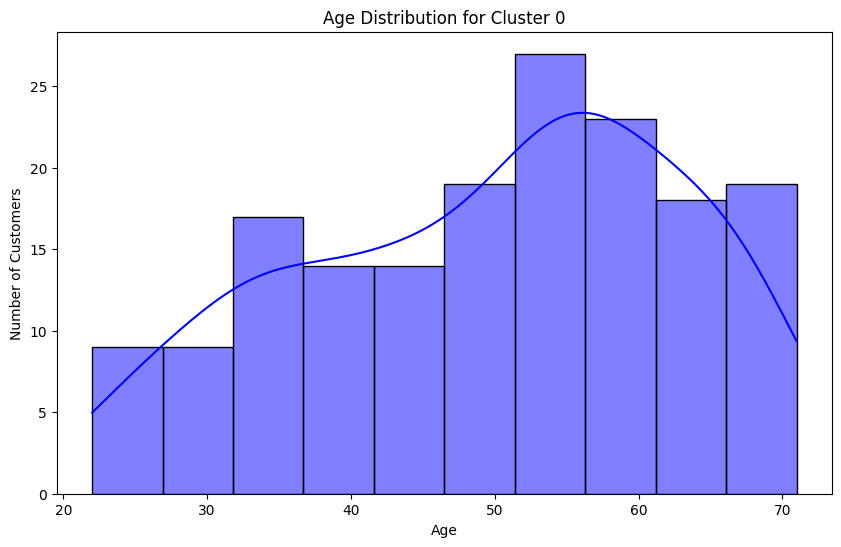

In [22]:
# get the hisplotogram of Age for cluster 0
plt.figure(figsize=(10, 6))
sns.histplot(cluster_0['Age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution for Cluster 0')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

By above, our target customers' age mainly between 50-60 and 53% are male

In [23]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


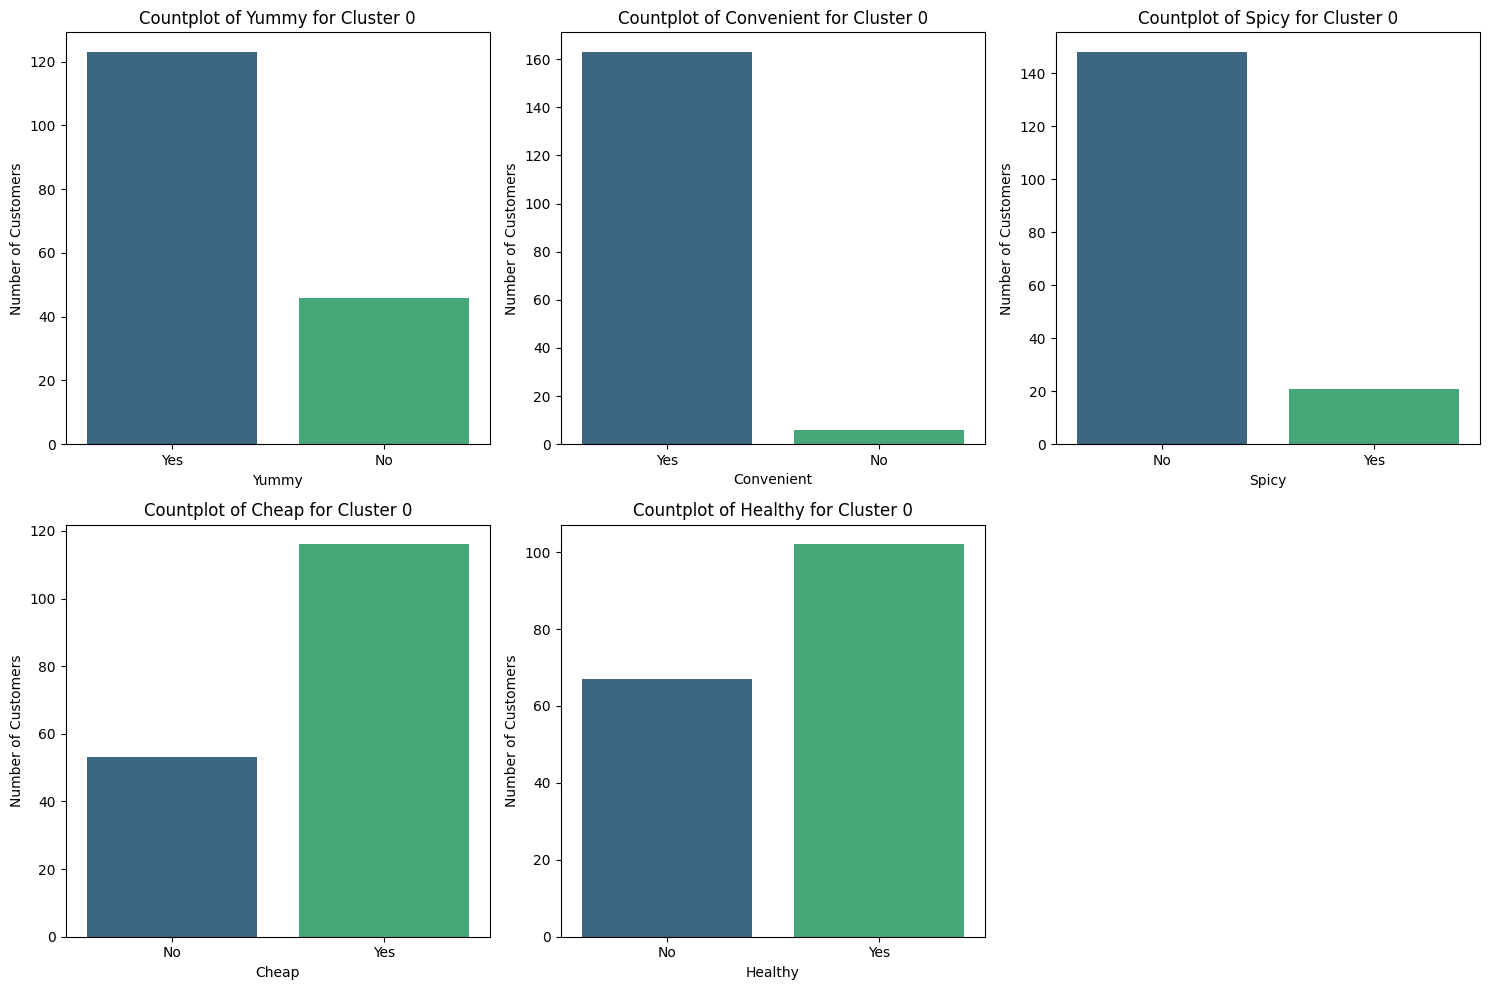

In [24]:
# get for cluster 0 countplot for yummy, convenient, spicy, cheap, healthy
df_with_clusters = df.copy()
df_with_clusters['kmeans_cluster'] = df_copy['kmeans_cluster'].values
cluster_0_df = df_with_clusters[df_with_clusters['kmeans_cluster'] == 0]

attributes = ['yummy', 'convenient', 'spicy', 'cheap', 'healthy']
plt.figure(figsize=(15, 10))
for i, attr in enumerate(attributes, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=attr, data=cluster_0_df, palette='viridis')
    plt.title(f'Countplot of {attr.capitalize()} for Cluster 0')
    plt.xlabel(attr.capitalize())
    plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

BY above：
prefers tasty,   
convenient, affordable,   
and relatively healthy food,   
especially non-spicy options.

# Suggest business strategy:  
To better serve this high-value segment of mostly 50–60-year-old male customers who prefer tasty, convenient, affordable, and relatively healthy non-spicy options, McDonald’s should emphasize fast service and value-driven meals built around non-spicy, “comfort-style” items. Marketing should highlight convenience and health-leaning choices (e.g., grilled or low-oil options), paired with simple promotions targeted to frequent visitors (loyalty points, bundle deals). This approach reinforces what the segment already values and encourages even more frequent visits.